In [262]:
filepath1='F:/mldata/hw2/data/data/X_train.csv'
filepath2='F:/mldata/hw2/data/data/Y_train.csv'
filepath3=r'F:\mldata\hw2\data\data\X_test.csv'
import numpy as np


In [263]:
with open(filepath1) as f:
    next(f)
    X_train=np.array([line.strip('\n').split(',')[1:] for line in f],dtype=float)

In [264]:
with open(filepath2) as f:
    next(f)
    Y_train=np.array([line.strip('\n').split(',')[1] for line in f],dtype=float)
    

In [265]:
with open(filepath3) as f:
    next(f)
    X_test=np.array([line.strip('\n').split(',')[1:] for line in f],dtype=float)

In [266]:
Y_train.shape

(54256,)

In [267]:
def _normalize(X, train = True, specified_column = None, X_mean = None, X_std = None):
    # This function normalizes specific columns of X.
    # The mean and standard variance of training data will be reused when processing testing data.
    #
    # Arguments:
    #     X: data to be processed
    #     train: 'True' when processing training data, 'False' for testing data
    #     specific_column: indexes of the columns that will be normalized. If 'None', all columns
    #         will be normalized.
    #     X_mean: mean value of training data, used when train = 'False'
    #     X_std: standard deviation of training data, used when train = 'False'
    # Outputs:
    #     X: normalized data
    #     X_mean: computed mean value of training data
    #     X_std: computed standard deviation of training data

    if specified_column == None:
        specified_column = np.arange(X.shape[1])
    if train:
        X_mean = np.mean(X[:, specified_column] ,0).reshape(1, -1)
        X_std  = np.std(X[:, specified_column], 0).reshape(1, -1)

    X[:,specified_column] = (X[:, specified_column] - X_mean) / (X_std + 1e-8)
     
    return X, X_mean, X_std

In [268]:
def normalize(X,train=True,specified_column=None,X_mean=None,X_std=None):
    if specified_column==None:
        specified_column=np.arange(X.shape[1])
    if train:
        X_mean=np.mean(X[:,specified_column],axis=0).reshape(1,-1)
        X_std=np.std(X[:,specified_column],axis=1).reshape(1,-1)
    X[:,specified_column]=(X[:,specified_column]-X_mean)/(X_std+1e-8)
    return X,X_mean,X_std


In [269]:
def _train_test_dev(X,Y,ratio):
    rate=int(len(X)*(1-ratio))
    return X[:rate,:],Y[:rate],X[rate:],Y[rate:]



In [270]:
X_train,X_mean,X_std=_normalize(X_train,train=True)

In [271]:
X_test,_,_=_normalize(X_test,train=False,X_mean=X_mean,X_std=X_std)

In [272]:
ratio=0.1
X_train,Y_train,X_val,Y_val=_train_test_dev(X_train,Y_train,ratio=ratio)

In [273]:
X_train.shape

(48830, 510)

In [274]:
def shuffle(X,Y):
    random=np.arange(len(X))
    np.random.shuffle(random)#直接打乱原始序列的顺序无返回值
    return X[random],Y[random]


In [275]:
def sigmoid(z):
    return np.clip((1/(1-np.exp(-z))),1e-8,1-1e-8)

In [276]:
def f(X,W,b):
    return sigmoid(np.matmul(X,W)+b)

In [277]:
def perdict(X,W,b):
    return np.round(f(X,W,b)).astype(np.int)

In [278]:
def accuracy(Y,Y_label):
    return 1-np.mean(np.abs(Y-Y_label))

In [288]:
def cross_entrophy_loss(y_pred,Y_label):
    loss=-np.dot(Y_label,np.log(y_pred))-np.dot(1-Y_label,np.log(1-y_pred))
    return loss
def gradient(X,Y_label,w,b):
    y_pred=f(X,w,b)
    pred_error=Y_label-y_pred
    w_grad=-np.sum((pred_error * X.T),axis=1)
    b_grad=-np.sum(pred_error)
    return w_grad,b_grad

In [303]:
# Zero initialization for weights ans bias
data_dim=X_train.shape[1]
w = np.zeros((data_dim,)) 
b = np.zeros((1,))

#Some parameters for training    
max_iter = 15
batch_size = 10
learning_rate = 0.02
train_size=X_train.shape[0]
# Keep the loss and accuracy at every iteration for plotting
train_loss = []
dev_loss = []
train_acc = []
dev_acc = []

train_size = X_train.shape[0]
dev_size = X_val.shape[0]
test_size = X_test.shape[0]
data_dim = X_train.shape[1]
#Calcuate the number of parameter updates
step=1

#Iterative training
for epoch in range(max_iter):
    # Random shuffle at the begging of each epoch
    X_train, Y_train = shuffle(X_train, Y_train)
        
    # Mini-batch training
    for idx in range(int(np.floor(train_size / batch_size))):
        X = X_train[idx*batch_size:(idx+1)*batch_size]
        Y = Y_train[idx*batch_size:(idx+1)*batch_size]

        # Compute the gradient
        w_grad, b_grad = gradient(X, Y, w, b)
            
        # gradient descent update
        # learning rate decay with time
        w = w - learning_rate/np.sqrt(step) * w_grad
        b = b - learning_rate/np.sqrt(step) * b_grad

        step = step + 1
            
    # Compute loss and accuracy of training set and development set
    y_train_pred = f(X_train, w, b)
    Y_train_pred = np.round(y_train_pred)
    train_acc.append(accuracy(Y_train_pred, Y_train))
    train_loss.append(cross_entrophy_loss(y_train_pred, Y_train) / train_size)

    y_dev_pred = f(X_val, w, b)
    Y_dev_pred = np.round(y_dev_pred)
    dev_acc.append(accuracy(Y_dev_pred, Y_val))
    dev_loss.append(cross_entrophy_loss(y_dev_pred, Y_val) / dev_size)

print('Training loss: {}'.format(train_loss[-1]))
print('Development loss: {}'.format(dev_loss[-1]))
print('Training accuracy: {}'.format(train_acc[-1]))
print('Development accuracy: {}'.format(dev_acc[-1]))

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


Training loss: 3.202399328596044
Development loss: 3.245516187465909
Training accuracy: 0.8261519557648986
Development accuracy: 0.8238112790269074


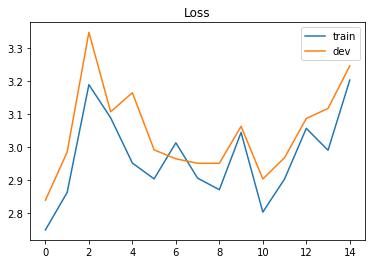

In [304]:
import matplotlib.pyplot as plt

# Loss curve
plt.plot(train_loss)
plt.plot(dev_loss)
plt.title('Loss')
plt.legend(['train', 'dev'])
plt.savefig('loss.png')
plt.show()



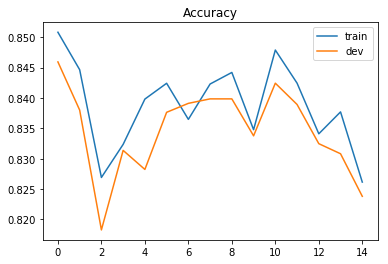

In [305]:
# Accuracy curve
plt.plot(train_acc)
plt.plot(dev_acc)
plt.title('Accuracy')
plt.legend(['train', 'dev'])
plt.savefig('acc.png')
plt.show()

In [ ]:
X=X_train[0:8]
Y=Y_train[0:8]
y_pred=f(X,w,b)

In [ ]:
w.shape

In [ ]:
error=Y-y_pred

In [ ]:
error.shape

In [ ]:
w_grad=np.sum(error*)

In [ ]:
y=_f(X,w,b)

In [ ]:
((y-Y)*X.T).shape